In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import xgboost
import lightgbm
import tsfresh

In [17]:
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=100)

In [18]:
X

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973],
       [ 0.231206  , -0.53275899],
       [ 0.15623875, -0.8678088 ],
       [ 0.51647541,  0.48940995],
       [ 0.68707007, -0.02334129],
       [ 0.54759869, -0.16482373],
       [-0.32179572, -0.80553536],
       [-1.07478639, -0.733362  ],
       [ 0.76758455, -0.43498783],
       [-0.47475234, -0.33813186],
       [ 0.15420656,  1.07306032],
       [ 0.65916696,  0.20773634],
       [-0.77795003,  0.1326555 ],
       [ 0.47025454, -0.31228748],
       [-0.04246799,  0.26555446],
       [-0.72405954,  0.48807185],
       [-0.36960005, -1.06514028],
       [ 0.17833327, -0.49718972],
       [-0.93927864, -0.41951638],
       [ 0.50914152,

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

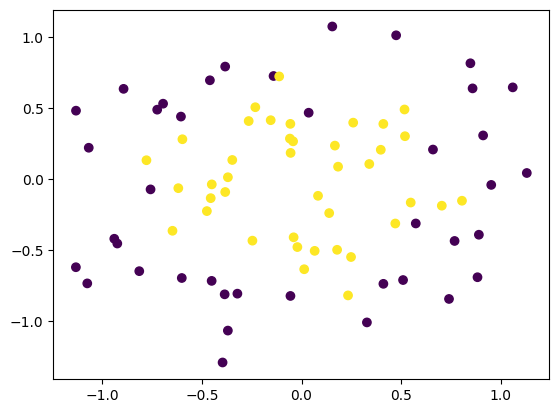

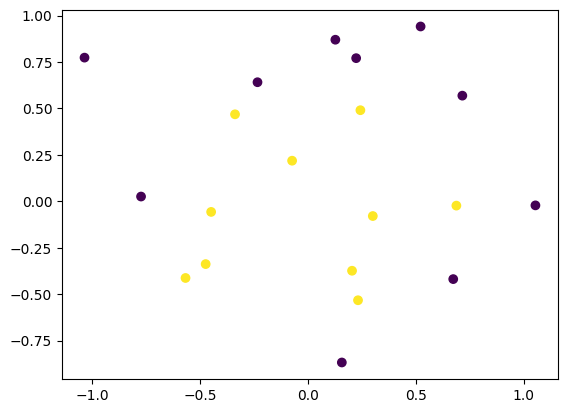

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [21]:
# model = DecisionTreeClassifier(max_depth=1)
model = RandomForestClassifier(n_estimators=10)
# model = xgboost.XGBClassifier(n_estimators=10)
# model = lightgbm.LGBMClassifier(n_estimators=7, num_leaves=16)

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [23]:
model.feature_importances_

array([0.49879553, 0.50120447])

In [24]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

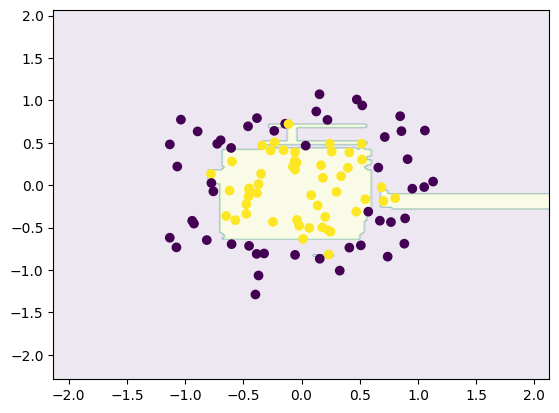

In [25]:
for clf in [model]:
    h = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    h = h.reshape(xx.shape)

    plt.contourf(xx, yy, h, alpha=0.1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.show()

In [26]:
f1_score(y_train, model.predict(X_train)), f1_score(y_test, model.predict(X_test))

(1.0, 0.888888888888889)

In [66]:
df = pd.read_csv("data/idle/idle-1.csv")

In [75]:
pd.DataFrame(
    {
        "mean_acc_X": [df["accelerometer_X"].mean()],
        "mean_acc_Y": [df["accelerometer_Y"].mean()],
        "mean_acc_Z": [df["accelerometer_Z"].mean()],

        "kurtosis_acc_X": [df["accelerometer_X"].kurtosis()],
    }
)

,mean_acc_X,mean_acc_Y,mean_acc_Z,kurtosis_acc_X
0,0.178448,0.167435,9.605697,18.543171


In [81]:
df[["accelerometer_X"]].T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
accelerometer_X,1.000776,0.718261,-0.909797,5.09965,1.762132,-0.086191,-0.062249,-0.057461,-0.124498,-0.138864,...,-0.124498,-0.320823,0.148441,0.407014,-0.311246,-0.038307,-0.114922,-0.124498,-0.167594,-0.11971


In [85]:
df_1 = pd.read_csv("data/idle/idle-1.csv")
df_2 = pd.read_csv("data/idle/idle-2.csv")
df_3 = pd.read_csv("data/idle/idle-3.csv")

In [86]:
df_1["id"] = 0
df_2["id"] = 1
df_3["id"] = 2

In [87]:
df = pd.concat([df_1, df_2, df_3]).reset_index(drop=True)

In [88]:
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,id
0,1.000776,4.616021,8.576031,0
1,0.718261,4.209007,8.446744,0
2,-0.909797,-0.282516,9.203311,0
3,5.099650,0.148441,8.418014,0
4,1.762132,-0.162806,9.251195,0
...,...,...,...,...
85,-0.119710,-0.124498,9.792285,2
86,-0.100556,-0.148441,9.792285,2
87,-0.138864,-0.110133,9.782708,2
88,-0.114922,-0.129287,9.777920,2


In [89]:
df.groupby("id")["accelerometer_X"].sum()

id
0    5.353436
1    3.394979
2   -1.039083
Name: accelerometer_X, dtype: float64

In [90]:
df_features = tsfresh.extract_features(df, column_id='id')

Feature Extraction: 100%|██████████| 9/9 [00:01<00:00,  8.86it/s]


In [92]:
df_features.dropna(axis=1)

,accelerometer_X__variance_larger_than_standard_deviation,accelerometer_X__has_duplicate_max,accelerometer_X__has_duplicate_min,accelerometer_X__has_duplicate,accelerometer_X__sum_values,accelerometer_X__abs_energy,accelerometer_X__mean_abs_change,accelerometer_X__mean_change,accelerometer_X__mean_second_derivative_central,accelerometer_X__median,...,accelerometer_Z__fourier_entropy__bins_3,accelerometer_Z__fourier_entropy__bins_5,accelerometer_Z__fourier_entropy__bins_10,accelerometer_Z__fourier_entropy__bins_100,accelerometer_Z__permutation_entropy__dimension_3__tau_1,accelerometer_Z__permutation_entropy__dimension_4__tau_1,accelerometer_Z__permutation_entropy__dimension_5__tau_1,accelerometer_Z__permutation_entropy__dimension_6__tau_1,accelerometer_Z__permutation_entropy__dimension_7__tau_1,accelerometer_Z__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,5.353436,32.102580,0.536631,-0.038637,0.005900,-0.102950,...,0.376770,0.376770,0.463414,1.244017,1.757135,2.692291,3.204778,3.218876,3.178054,9.792969
1,1.0,0.0,0.0,1.0,3.394979,30.614523,0.472731,0.026584,-0.107996,-0.110133,...,0.463414,0.463414,0.463414,0.918046,1.763115,2.621567,3.151459,3.218876,3.178054,9.794337
2,0.0,0.0,0.0,1.0,-1.039083,3.810284,0.151743,-0.065221,0.032749,-0.114922,...,0.463414,0.986899,1.548116,2.685945,1.770307,2.570223,3.151459,3.218876,3.178054,9.794337


In [95]:
df_features["accelerometer_X__sum_values"]

0    5.353436
1    3.394979
2   -1.039083
Name: accelerometer_X__sum_values, dtype: float64

In [93]:
for x in df_features.dropna(axis=1).columns:
    print(x)

accelerometer_X__variance_larger_than_standard_deviation
accelerometer_X__has_duplicate_max
accelerometer_X__has_duplicate_min
accelerometer_X__has_duplicate
accelerometer_X__sum_values
accelerometer_X__abs_energy
accelerometer_X__mean_abs_change
accelerometer_X__mean_change
accelerometer_X__mean_second_derivative_central
accelerometer_X__median
accelerometer_X__mean
accelerometer_X__length
accelerometer_X__standard_deviation
accelerometer_X__variation_coefficient
accelerometer_X__variance
accelerometer_X__skewness
accelerometer_X__kurtosis
accelerometer_X__root_mean_square
accelerometer_X__absolute_sum_of_changes
accelerometer_X__longest_strike_below_mean
accelerometer_X__longest_strike_above_mean
accelerometer_X__count_above_mean
accelerometer_X__count_below_mean
accelerometer_X__last_location_of_maximum
accelerometer_X__first_location_of_maximum
accelerometer_X__last_location_of_minimum
accelerometer_X__first_location_of_minimum
accelerometer_X__percentage_of_reoccurring_values_to_a

In [ ]:
idle  :  1039
running  :  3408
stairs  :  165
walking  :  1850

In [101]:
y = [0] * 1039 + [1] * 3408 + [2] * 165 + [3] * 1850

In [102]:
from sklearn.model_selection import train_test_split

In [155]:
y_train, y_test = train_test_split(y, test_size=0.2, stratify=y)

In [156]:
import collections

In [157]:
d1 = collections.Counter(y_train)
d2 = collections.Counter(y_test)
d1, d2

(Counter({1: 2726, 3: 1480, 0: 831, 2: 132}),
 Counter({3: 370, 1: 682, 0: 208, 2: 33}))

In [158]:
for k in d1.keys():
    print(k, d1[k], d2[k], d2[k] / (d1[k] + d2[k]))

1 2726 682 0.20011737089201878
3 1480 370 0.2
0 831 208 0.20019249278152068
2 132 33 0.2
